### 1. 비재무 데이터에 대한거 항목별 데이터수
### 2. describe null 개수 
### 3. target 과의 상관계수
### -> OLS or heatmap

In [190]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from statsmodels.formula.api import ols
# 한글
import matplotlib.pyplot as plt
from matplotlib import font_manager as fm , rc
plt.rcParams['font.family'] = 'gulim'

In [6]:
# 넘블 챌린지
nb_codzip = pd.read_excel('넘블 챌린지 개방데이터 코드집.xlsx', sheet_name=0)
nb_codzip_finance = pd.read_excel('넘블 챌린지 개방데이터 코드집.xlsx', sheet_name=1)
nb_layout = pd.read_excel('넘블 챌린지 개방데이터 레이아웃.xlsx')
nb_active_out = pd.read_excel('액티브 중소법인 재무보유.xlsx', sheet_name=0)
nb_active_overview = pd.read_excel('액티브 중소법인 재무보유.xlsx', sheet_name=1)
nb_active_oclog = pd.read_excel('액티브 중소법인 재무보유.xlsx', sheet_name=2)
nb_deactive_overview = pd.read_excel('휴폐업 중소법인 재무보유.xlsx', sheet_name=0)
nb_deactive_oclog = pd.read_excel('휴폐업 중소법인 재무보유.xlsx', sheet_name=1)
nb_finance_data = pd.read_csv('재무데이터.txt', encoding='cp949', sep='\t')
nb_active_ind = pd.read_excel('액티브_중소법인_기업개요_산업분류.xlsx')
nb_deactive_ind = pd.read_excel('휴폐업_중소법인_기업개요_산업분류.xlsx')
nb_active_out_ind = pd.read_excel('액티브_중소법인_기업외감_산업분류.xlsx')

In [4]:
sbiz_active = pd.read_csv('엑티브산업분류_nice_sbiz.csv')
sbiz_deactive = pd.read_csv('휴폐업산업분류_nice_sbiz.csv')

## 액티브 기업 외감 정보 EDA

In [7]:
nb_active_out

,BIZ_NO,CMP_PFIX_NM,CMP_NM1,CMP_SFIX_NM,CMP_ENM,BZ_TYP,CMP_SCL,PBCO_GB,PSN_CORP_GB,HDOF_BR_GB,...,MDSCO_PRTC_YN,HDOF_CMP_CD,ESTB_DATE,ESTB_GB,LIST_DATE,MN_BIZ_CONT,NATN_NM,HOMEPAGE_URL,CEO_NM,EMP_CNT
0,1138111739,NaN,한일가스산업,(주),"HANIL GAS IND. CO.,LTD.",M,2,2,1,1,...,N,NaN,19660419.0,1,NaN,LP Gas 충전 및 판매업,NaN,www.hanilgas.com,홍순철외 1명,43.0
1,2078132193,(주),엠피아이,NaN,"EMPIALEE CO.,LTD.",M,2,2,1,1,...,N,NaN,19910806.0,1,NaN,가죽 및 대용가죽제품 제조업,NaN,www.mastercnd.co.kr,이스테판상수외 1명,35.0
2,1318167565,NaN,도영운수,(주),"DOYOUNG TRANSPORTATION CO.,LTD.",M,2,2,1,1,...,N,NaN,20011030.0,1,NaN,시내버스업,NaN,transport@naver.com,김명화,149.0
3,5048128251,(주),중원산업,NaN,"JOONGWON INDUSTRIAL CO.,LTD.",M,2,2,1,1,...,N,NaN,19990112.0,1,NaN,자동차 부품 제조,NaN,www.koreajw.com,김명구,75.0
4,1098164260,(주),카타나골프,NaN,"CATANA GOLF CO.,LTD.",M,2,2,1,1,...,N,NaN,20000531.0,1,NaN,골프용품 전반의 제조 및 수출업,NaN,NaN,김홍득,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28977,8048101453,NaN,제이앤인베스트먼트,NaN,J&INVESTMENT,M,2,2,1,1,...,N,NaN,20191206.0,1,NaN,경영컨설팅업,NaN,NaN,정경태,0.0
28978,8028701430,NaN,디앤엠개발,(주),"DNM Development Co., Ltd.",M,2,2,1,1,...,N,NaN,20200402.0,1,NaN,비주거용 건물 임대업,NaN,NaN,송성현,1.0
28979,4268501421,NaN,마스비 건축연구소,NaN,NaN,M,2,2,1,2,...,N,1220726.0,19900108.0,1,NaN,"BIM용역, 엔지니어링컨설팅",NaN,NaN,김태남,81.0
28980,6518502462,(주),건설레미콘의정부공장,NaN,"Construction Remicon Uijeongbu Factory Co., Ltd.",M,2,2,1,2,...,N,1583116.0,20220615.0,1,NaN,레미콘,NaN,NaN,이미성,26.0


In [8]:
nb_active_out.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28982 entries, 0 to 28981
Data columns (total 28 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   BIZ_NO           28982 non-null  int64  
 1   CMP_PFIX_NM      18580 non-null  object 
 2   CMP_NM1          28982 non-null  object 
 3   CMP_SFIX_NM      9169 non-null   object 
 4   CMP_ENM          28965 non-null  object 
 5   BZ_TYP           28982 non-null  object 
 6   CMP_SCL          28982 non-null  int64  
 7   PBCO_GB          28982 non-null  int64  
 8   PSN_CORP_GB      28982 non-null  int64  
 9   HDOF_BR_GB       28982 non-null  int64  
 10  FR_IVST_CORP_YN  28982 non-null  object 
 11  VENT_YN          28982 non-null  object 
 12  LIST_CD          89 non-null     object 
 13  IND_CD_ORDR      28972 non-null  float64
 14  IND_CD1          28971 non-null  float64
 15  IND_CD2          1200 non-null   float64
 16  IND_CD3          263 non-null    float64
 17  PB_ORG_TYP  

In [9]:
nb_active_out.describe()

,BIZ_NO,CMP_SCL,PBCO_GB,PSN_CORP_GB,HDOF_BR_GB,IND_CD_ORDR,IND_CD1,IND_CD2,IND_CD3,PB_ORG_TYP,HDOF_CMP_CD,ESTB_DATE,ESTB_GB,LIST_DATE,EMP_CNT
count,2.898200e+04,28982.0,28982.000000,28982.0,28982.000000,28972.0,28971.000000,1200.000000,263.000000,28982.000000,2.907000e+03,2.790800e+04,28982.000000,1.590000e+02,28248.000000
mean,3.242493e+09,2.0,1.999758,1.0,1.100476,10.0,44546.256049,42996.762500,44659.452471,0.003416,1.833925e+06,2.004160e+07,1.454178,2.005687e+07,62.770886
std,2.150286e+09,0.0,0.015540,0.0,0.300639,0.0,20314.518835,15286.614776,13807.936325,0.099108,8.533543e+05,1.162984e+05,6.352331,1.186447e+05,137.411139
min,1.018100e+09,2.0,1.000000,1.0,1.000000,10.0,1100.000000,1121.000000,10213.000000,0.000000,1.100677e+06,1.887010e+07,1.000000,1.976033e+07,0.000000
25%,1.308128e+09,2.0,2.000000,1.0,1.000000,10.0,27219.000000,30397.250000,42120.500000,0.000000,1.325254e+06,1.998073e+07,1.000000,1.997011e+07,7.000000
50%,2.208740e+09,2.0,2.000000,1.0,1.000000,10.0,46109.000000,42209.000000,42310.000000,0.000000,1.600937e+06,2.006042e+07,1.000000,2.008040e+07,30.000000
75%,5.118408e+09,2.0,2.000000,1.0,1.000000,10.0,64999.000000,46599.000000,46496.000000,0.000000,1.908797e+06,2.013090e+07,1.000000,2.016016e+07,67.000000
max,8.998801e+09,2.0,2.000000,1.0,2.000000,10.0,96999.000000,95212.000000,91130.000000,3.000000,9.333073e+06,2.022071e+07,99.000000,2.022063e+07,5099.000000


In [11]:
nb_active_out.describe(include='all')

,BIZ_NO,CMP_PFIX_NM,CMP_NM1,CMP_SFIX_NM,CMP_ENM,BZ_TYP,CMP_SCL,PBCO_GB,PSN_CORP_GB,HDOF_BR_GB,...,MDSCO_PRTC_YN,HDOF_CMP_CD,ESTB_DATE,ESTB_GB,LIST_DATE,MN_BIZ_CONT,NATN_NM,HOMEPAGE_URL,CEO_NM,EMP_CNT
count,2.898200e+04,18580,28982,9169,28965,28982,28982.0,28982.000000,28982.0,28982.000000,...,28982,2.907000e+03,2.790800e+04,28982.000000,1.590000e+02,28819,1645,17754,28981,28248.000000
unique,NaN,3,27359,2,28136,8,NaN,NaN,NaN,NaN,...,2,NaN,NaN,NaN,NaN,20005,63,15775,19443,NaN
top,NaN,(주),주택관리공단,(주),"Korea Housing Management Co.,Ltd.",M,NaN,NaN,NaN,NaN,...,N,NaN,NaN,NaN,NaN,주택건설업,일본,-,서종균,NaN
freq,NaN,18458,10,8916,167,28617,NaN,NaN,NaN,NaN,...,28884,NaN,NaN,NaN,NaN,242,379,613,218,NaN
mean,3.242493e+09,NaN,NaN,NaN,NaN,NaN,2.0,1.999758,1.0,1.100476,...,NaN,1.833925e+06,2.004160e+07,1.454178,2.005687e+07,NaN,NaN,NaN,NaN,62.770886
std,2.150286e+09,NaN,NaN,NaN,NaN,NaN,0.0,0.015540,0.0,0.300639,...,NaN,8.533543e+05,1.162984e+05,6.352331,1.186447e+05,NaN,NaN,NaN,NaN,137.411139
min,1.018100e+09,NaN,NaN,NaN,NaN,NaN,2.0,1.000000,1.0,1.000000,...,NaN,1.100677e+06,1.887010e+07,1.000000,1.976033e+07,NaN,NaN,NaN,NaN,0.000000
25%,1.308128e+09,NaN,NaN,NaN,NaN,NaN,2.0,2.000000,1.0,1.000000,...,NaN,1.325254e+06,1.998073e+07,1.000000,1.997011e+07,NaN,NaN,NaN,NaN,7.000000
50%,2.208740e+09,NaN,NaN,NaN,NaN,NaN,2.0,2.000000,1.0,1.000000,...,NaN,1.600937e+06,2.006042e+07,1.000000,2.008040e+07,NaN,NaN,NaN,NaN,30.000000
75%,5.118408e+09,NaN,NaN,NaN,NaN,NaN,2.0,2.000000,1.0,1.000000,...,NaN,1.908797e+06,2.013090e+07,1.000000,2.016016e+07,NaN,NaN,NaN,NaN,67.000000


In [15]:
# 문자 아닌 컬럼만 추출
active_nstr = nb_active_out.columns[nb_active_out.dtypes != 'object']
active_nstr

Index(['BIZ_NO', 'CMP_SCL', 'PBCO_GB', 'PSN_CORP_GB', 'HDOF_BR_GB',
       'IND_CD_ORDR', 'IND_CD1', 'IND_CD2', 'IND_CD3', 'PB_ORG_TYP',
       'HDOF_CMP_CD', 'ESTB_DATE', 'ESTB_GB', 'LIST_DATE', 'EMP_CNT'],
      dtype='object')

In [18]:
# 숫자 컬럼들 결측치 확인
nb_active_out[active_nstr].isna().sum()

BIZ_NO             0
CMP_SCL            0
PBCO_GB            0
PSN_CORP_GB        0
HDOF_BR_GB         0
IND_CD_ORDR       10
IND_CD1           11
IND_CD2        27782
IND_CD3        28719
PB_ORG_TYP         0
HDOF_CMP_CD    26075
ESTB_DATE       1074
ESTB_GB            0
LIST_DATE      28823
EMP_CNT          734
dtype: int64

In [51]:
# 결측치가 10000개 이상인 컬럽은 제외하고 나머지는 평균으로 값 채워줌
active_NaN_low = nb_active_out[active_nstr].isna().sum()[nb_active_out[active_nstr].isna().sum() < 10000].index
nb_active_out_copy = nb_active_out[active_NaN_low].copy()
for col in nb_active_out_copy.columns :
    nb_active_out_copy[col].fillna(nb_active_out_copy[col].mean(), inplace=True)
nb_active_out_copy.isna().sum()

BIZ_NO         0
CMP_SCL        0
PBCO_GB        0
PSN_CORP_GB    0
HDOF_BR_GB     0
IND_CD_ORDR    0
IND_CD1        0
PB_ORG_TYP     0
ESTB_DATE      0
ESTB_GB        0
EMP_CNT        0
dtype: int64

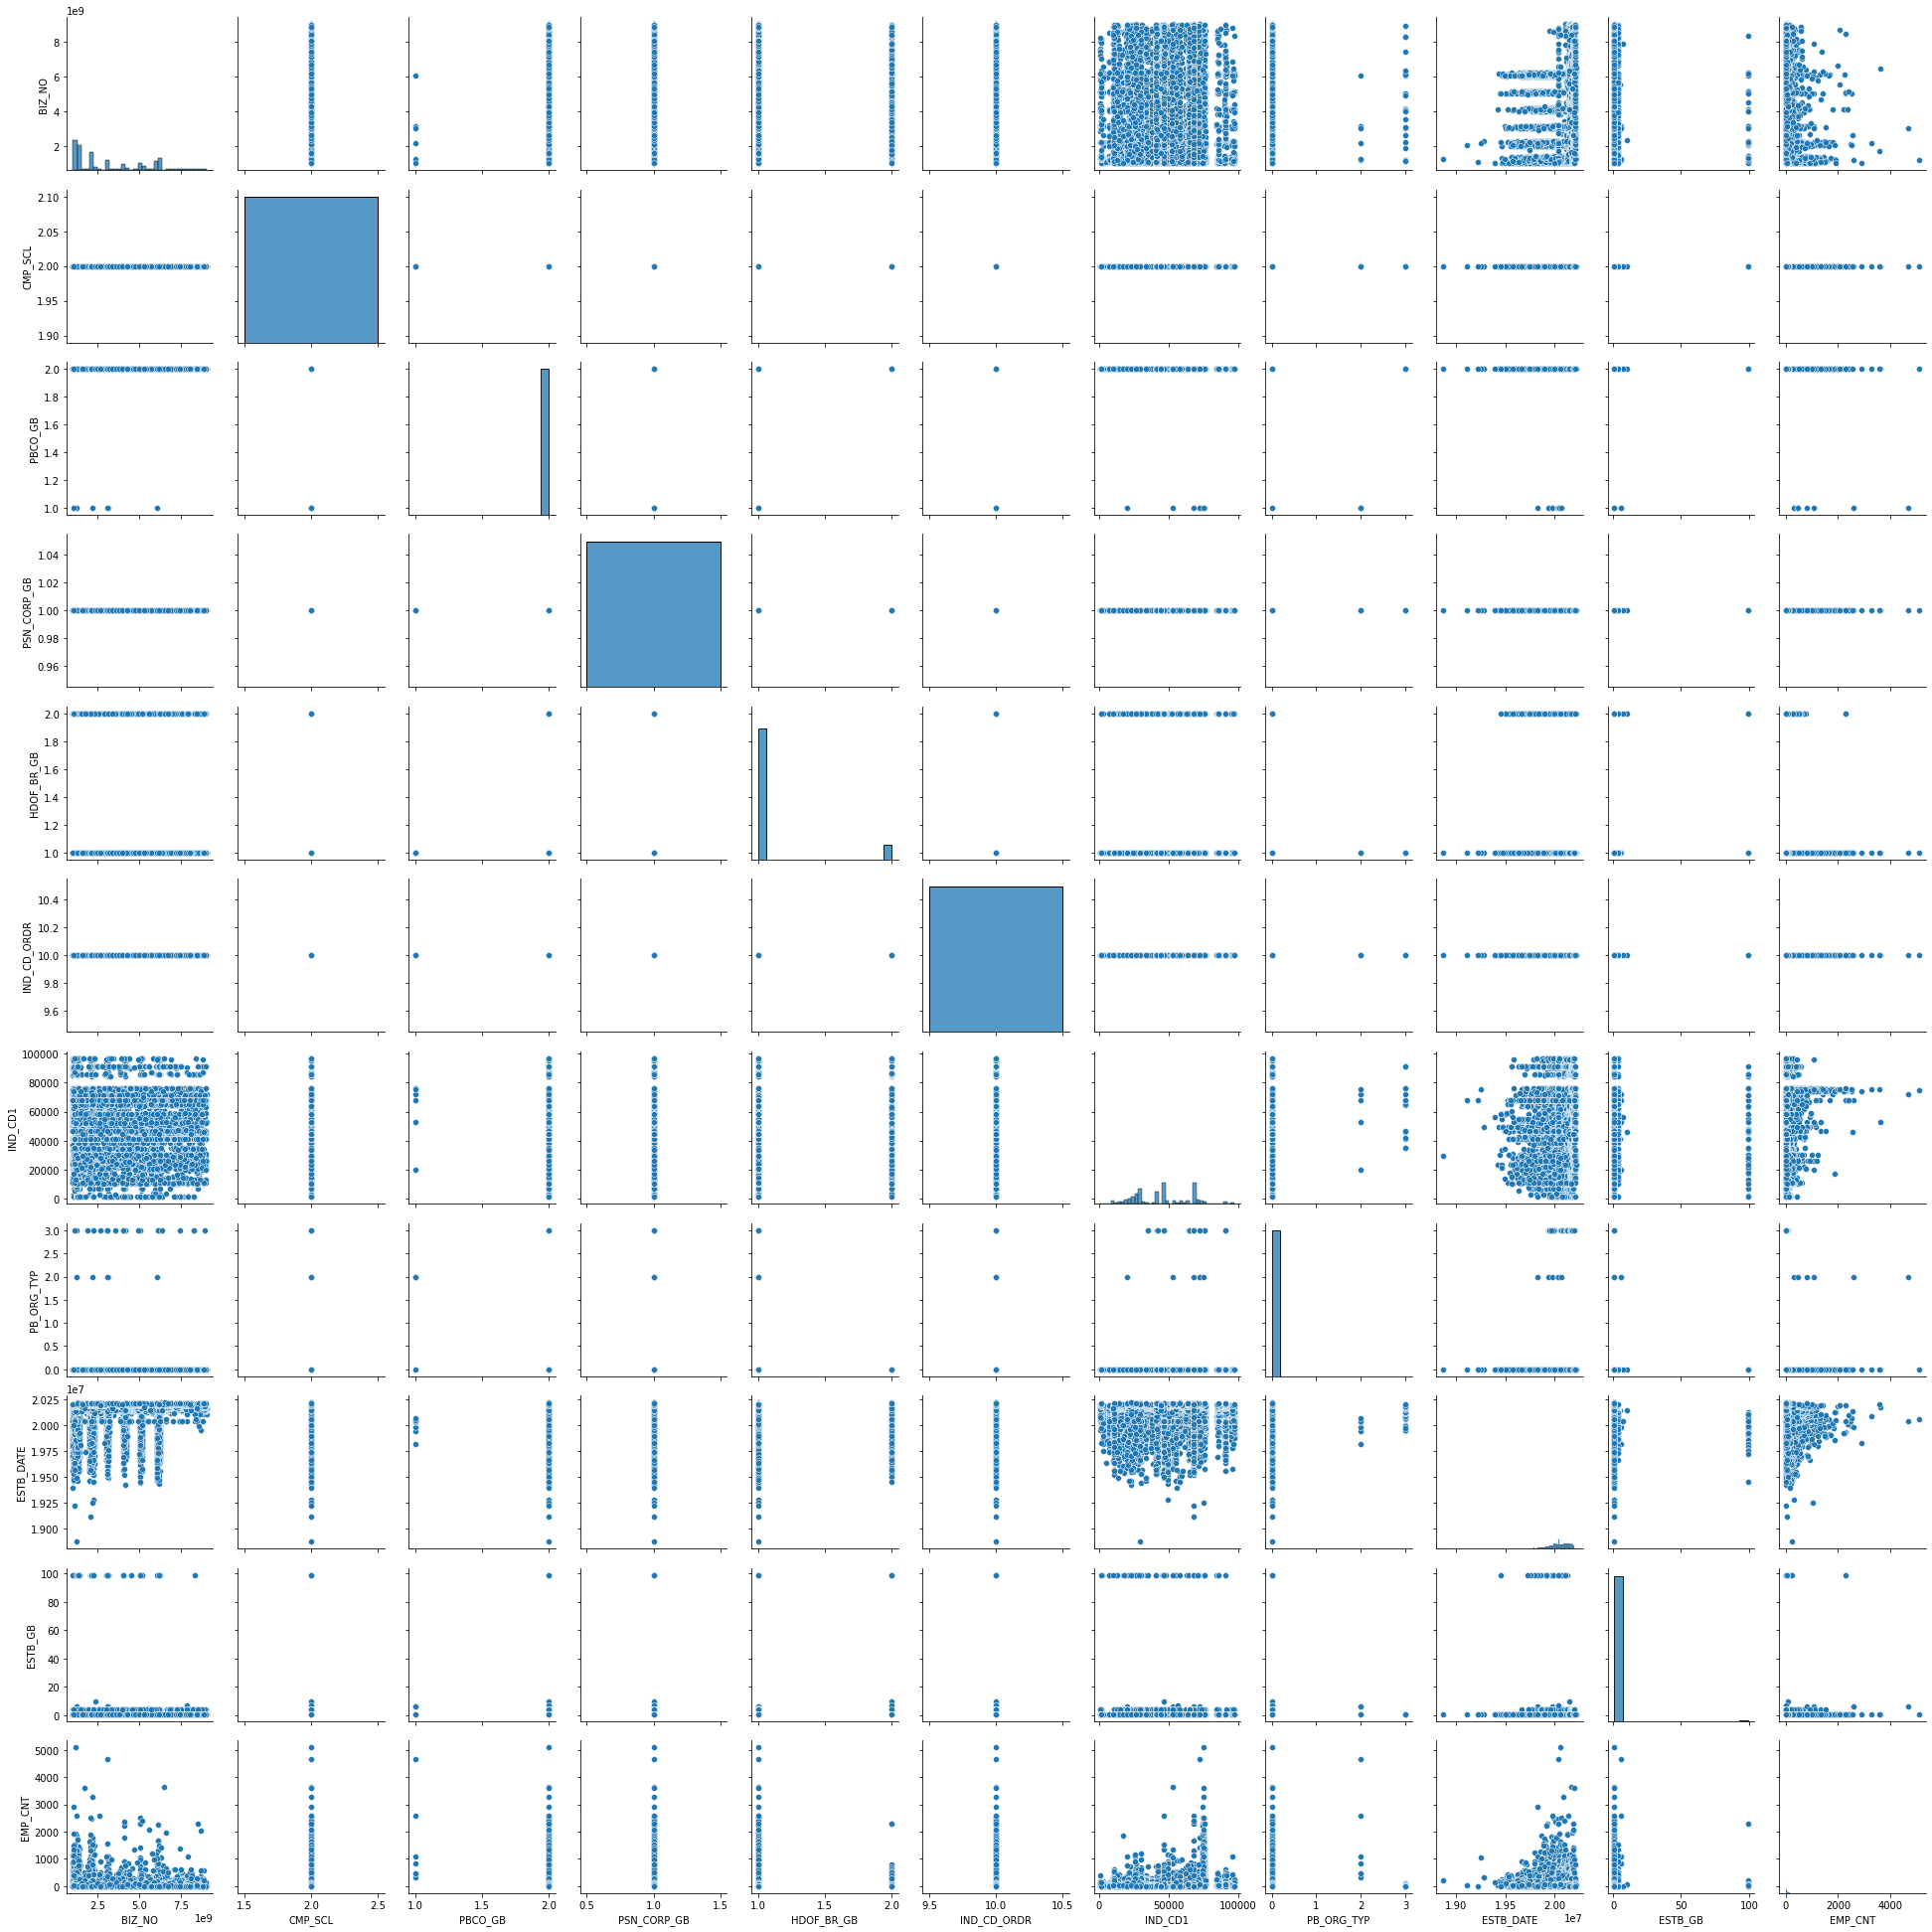

In [37]:
sns.pairplot(nb_active_out_copy)

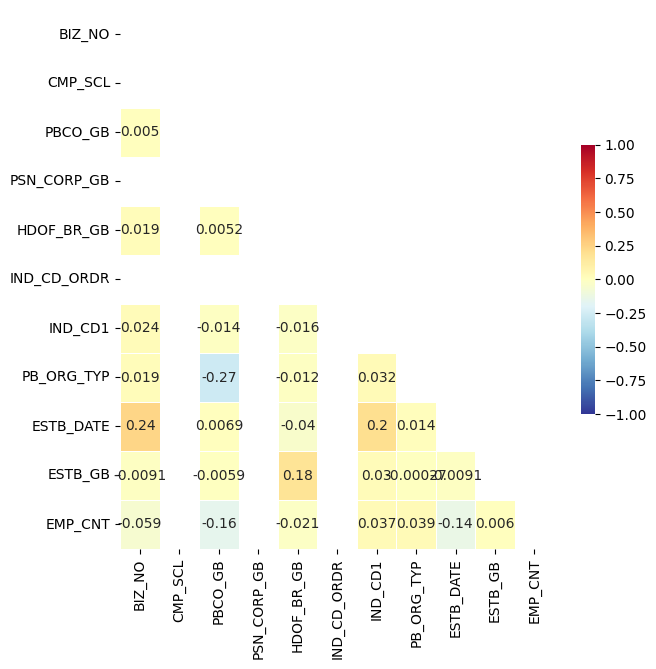

In [40]:
# 히트맵
df = nb_active_out_copy.corr()
fig, ax = plt.subplots( figsize=(7,7) )
mask = np.zeros_like(df, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# 히트맵을 그린다
sns.heatmap(df, 
            cmap = 'RdYlBu_r', 
            annot = True,   # 실제 값을 표시한다
            mask=mask,      # 표시하지 않을 마스크 부분을 지정한다
            linewidths=.5,  # 경계면 실선으로 구분하기
            cbar_kws={"shrink": .5},# 컬러바 크기 절반으로 줄이기
            vmin = -1,vmax = 1   # 컬러바 범위 -1 ~ 1
           )  
plt.show()

## 휴폐업 기업 외감 정보 EDA

In [43]:
nb_deactive_overview

,BIZ_NO,CMP_PFIX_NM,CMP_NM,CMP_SFIX_NM,CMP_ENM,BZ_TYP,CMP_SCL,PBCO_GB,PSN_CORP_GB,HDOF_BR_GB,...,MDSCO_PRTC_YN,HDOF_CMP_CD,ESTB_DATE,ESTB_GB,LIST_DATE,MN_BIZ_CONT,NATN_NM,HOMEPAGE_URL,CEO_NM,EMP_CNT
0,1268145633,(주),용진테크,NaN,"Yongjin Tech Co., Ltd.",M,2,2,1,1,...,N,NaN,20000529.0,1,NaN,자동차부품 제조판매업,NaN,www.yongjintech.com,안상동,40.0
1,1388101749,NaN,신구건설,(주),"SHINKU C0NSTRUCTION CO.,LTD.",M,2,2,1,1,...,N,NaN,19850110.0,1,NaN,건축자재 판매업,NaN,www.shinku.co.kr,소재필,13.0
2,1068179240,(주),석정미디어,NaN,sung jung,M,2,2,1,1,...,N,NaN,19990601.0,1,NaN,"토너, 잉크, 프린터 외 컴퓨터 관련 주변기기",NaN,NaN,이상호,1.0
3,2248114507,(주),새한실업,NaN,"SAEHAN INDUSTRY CO.,LTD.",M,2,2,1,1,...,N,NaN,19980522.0,1,NaN,금속 캔 및 기타 포장용기 제조업,NaN,NaN,김정남외 1명,6.0
4,1168132785,(주),석영엔터프라이즈,NaN,"Seokyoung Enterprise Co.,Ltd.",M,2,2,1,1,...,N,NaN,19930226.0,1,NaN,스마트트레이 외,NaN,www.systeel.co.kr,박성진,40.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6734,4808501629,NaN,게방식당팩토리,NaN,gebangsikdangfactory,M,2,2,1,2,...,N,8474403.0,20180126.0,1,NaN,간장게장(장류),NaN,https://gebangsikdang.modoo.at/,방건혁,NaN
6735,8018501578,(주),우진푸드중부지점,NaN,woojinfood,M,2,2,1,2,...,N,4033821.0,20200727.0,1,NaN,"돈가스, 탕수육, 꿔바로우",NaN,우진푸드.com,신남정,22.0
6736,4118523419,(주),윤월드푸드코리아다크써클브로스,NaN,"Youn World Food Korea Co., Ltd.",M,2,2,1,2,...,N,9189675.0,20190926.0,1,NaN,"한식, 중식",NaN,NaN,윤인수,0.0
6737,1738102533,(주),기린테크,NaN,"Girin Tech Co., Ltd.",M,2,2,1,1,...,N,NaN,20211025.0,1,NaN,1.인공지능(AI) 솔루션 구축 및 관련사업,NaN,NaN,임계현,NaN


In [44]:
nb_deactive_overview.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6739 entries, 0 to 6738
Data columns (total 28 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   BIZ_NO           6739 non-null   int64  
 1   CMP_PFIX_NM      4845 non-null   object 
 2   CMP_NM           6739 non-null   object 
 3   CMP_SFIX_NM      1286 non-null   object 
 4   CMP_ENM          6695 non-null   object 
 5   BZ_TYP           6739 non-null   object 
 6   CMP_SCL          6739 non-null   int64  
 7   PBCO_GB          6739 non-null   int64  
 8   PSN_CORP_GB      6739 non-null   int64  
 9   HDOF_BR_GB       6739 non-null   int64  
 10  FR_IVST_CORP_YN  6739 non-null   object 
 11  VENT_YN          6739 non-null   object 
 12  LIST_CD          46 non-null     object 
 13  IND_CD_ORDR      6734 non-null   float64
 14  IND_CD1          6589 non-null   float64
 15  IND_CD2          83 non-null     float64
 16  IND_CD3          11 non-null     float64
 17  PB_ORG_TYP    

In [45]:
nb_deactive_overview.describe()

,BIZ_NO,CMP_SCL,PBCO_GB,PSN_CORP_GB,HDOF_BR_GB,IND_CD_ORDR,IND_CD1,IND_CD2,IND_CD3,PB_ORG_TYP,HDOF_CMP_CD,ESTB_DATE,ESTB_GB,LIST_DATE,EMP_CNT
count,6.739000e+03,6739.0,6739.0,6739.0,6739.000000,6734.0,6589.000000,83.000000,11.000000,6739.0,1.451000e+03,6.174000e+03,6739.000000,4.900000e+01,6051.000000
mean,3.615364e+09,2.0,2.0,1.0,1.217391,10.0,43424.910457,45624.686747,44715.909091,0.0,2.262780e+06,2.010157e+07,2.528120,2.012709e+07,25.987275
std,2.247398e+09,0.0,0.0,0.0,0.412502,0.0,19411.258218,15632.382498,8396.508363,0.0,1.246607e+06,8.239682e+04,11.792944,6.955592e+04,222.573079
min,1.018135e+09,2.0,2.0,1.0,1.000000,10.0,1110.000000,10120.000000,28909.000000,0.0,1.101660e+06,1.936082e+07,1.000000,1.996102e+07,0.000000
25%,1.378635e+09,2.0,2.0,1.0,1.000000,10.0,28410.000000,42132.500000,42171.500000,0.0,1.452840e+06,2.006100e+07,1.000000,2.011093e+07,3.000000
50%,3.118147e+09,2.0,2.0,1.0,1.000000,10.0,46209.000000,42420.000000,42499.000000,0.0,1.799947e+06,2.013041e+07,1.000000,2.016022e+07,7.000000
75%,5.348100e+09,2.0,2.0,1.0,1.000000,10.0,56199.000000,47555.000000,46371.000000,0.0,2.746051e+06,2.016052e+07,1.000000,2.017121e+07,17.000000
max,8.998701e+09,2.0,2.0,1.0,2.000000,10.0,96999.000000,95211.000000,64910.000000,0.0,9.772964e+06,2.021102e+07,99.000000,2.019062e+07,16310.000000


In [46]:
nb_deactive_overview.describe(include='all')

,BIZ_NO,CMP_PFIX_NM,CMP_NM,CMP_SFIX_NM,CMP_ENM,BZ_TYP,CMP_SCL,PBCO_GB,PSN_CORP_GB,HDOF_BR_GB,...,MDSCO_PRTC_YN,HDOF_CMP_CD,ESTB_DATE,ESTB_GB,LIST_DATE,MN_BIZ_CONT,NATN_NM,HOMEPAGE_URL,CEO_NM,EMP_CNT
count,6.739000e+03,4845,6739,1286,6695,6739,6739.0,6739.0,6739.0,6739.000000,...,6739,1.451000e+03,6.174000e+03,6739.000000,4.900000e+01,6571,144,2125,6738,6051.000000
unique,NaN,4,6629,4,6586,3,NaN,NaN,NaN,NaN,...,2,NaN,NaN,NaN,NaN,5111,27,1996,5531,NaN
top,NaN,(주),슈펙스비앤피,(주),"Fuji Trading Co., Ltd.",M,NaN,NaN,NaN,NaN,...,N,NaN,NaN,NaN,NaN,건축공사업,일본,-,김재림,NaN
freq,NaN,4727,5,1260,18,6698,NaN,NaN,NaN,NaN,...,6728,NaN,NaN,NaN,NaN,70,41,52,21,NaN
mean,3.615364e+09,NaN,NaN,NaN,NaN,NaN,2.0,2.0,1.0,1.217391,...,NaN,2.262780e+06,2.010157e+07,2.528120,2.012709e+07,NaN,NaN,NaN,NaN,25.987275
std,2.247398e+09,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.412502,...,NaN,1.246607e+06,8.239682e+04,11.792944,6.955592e+04,NaN,NaN,NaN,NaN,222.573079
min,1.018135e+09,NaN,NaN,NaN,NaN,NaN,2.0,2.0,1.0,1.000000,...,NaN,1.101660e+06,1.936082e+07,1.000000,1.996102e+07,NaN,NaN,NaN,NaN,0.000000
25%,1.378635e+09,NaN,NaN,NaN,NaN,NaN,2.0,2.0,1.0,1.000000,...,NaN,1.452840e+06,2.006100e+07,1.000000,2.011093e+07,NaN,NaN,NaN,NaN,3.000000
50%,3.118147e+09,NaN,NaN,NaN,NaN,NaN,2.0,2.0,1.0,1.000000,...,NaN,1.799947e+06,2.013041e+07,1.000000,2.016022e+07,NaN,NaN,NaN,NaN,7.000000
75%,5.348100e+09,NaN,NaN,NaN,NaN,NaN,2.0,2.0,1.0,1.000000,...,NaN,2.746051e+06,2.016052e+07,1.000000,2.017121e+07,NaN,NaN,NaN,NaN,17.000000


In [58]:
# 문자 아닌 컬럼만 추출
deactive_nstr = nb_deactive_overview.columns[nb_deactive_overview.dtypes != 'object']
deactive_nstr

Index(['BIZ_NO', 'CMP_SCL', 'PBCO_GB', 'PSN_CORP_GB', 'HDOF_BR_GB',
       'IND_CD_ORDR', 'IND_CD1', 'IND_CD2', 'IND_CD3', 'PB_ORG_TYP',
       'HDOF_CMP_CD', 'ESTB_DATE', 'ESTB_GB', 'LIST_DATE', 'EMP_CNT'],
      dtype='object')

In [59]:
# 액티브 숫자 데이터랑 컬럽 비교
active_nstr == deactive_nstr

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True])

In [60]:
# 숫자 컬럼들 결측치 확인
nb_deactive_overview[deactive_nstr].isna().sum()

BIZ_NO            0
CMP_SCL           0
PBCO_GB           0
PSN_CORP_GB       0
HDOF_BR_GB        0
IND_CD_ORDR       5
IND_CD1         150
IND_CD2        6656
IND_CD3        6728
PB_ORG_TYP        0
HDOF_CMP_CD    5288
ESTB_DATE       565
ESTB_GB           0
LIST_DATE      6690
EMP_CNT         688
dtype: int64

In [66]:
# 결측치가 10000개 이상인 컬럽은 제외하고 나머지는 평균으로 값 채워줌
deactive_NaN_low = nb_deactive_overview[deactive_nstr].isna().sum()[nb_deactive_overview[deactive_nstr].isna().sum() < 5000].index
nb_deactive_out_copy = nb_deactive_overview[deactive_NaN_low].copy()
for col in nb_deactive_out_copy.columns :
    nb_deactive_out_copy[col].fillna(nb_deactive_out_copy[col].mean(), inplace=True)
nb_deactive_out_copy.isna().sum()

BIZ_NO         0
CMP_SCL        0
PBCO_GB        0
PSN_CORP_GB    0
HDOF_BR_GB     0
IND_CD_ORDR    0
IND_CD1        0
PB_ORG_TYP     0
ESTB_DATE      0
ESTB_GB        0
EMP_CNT        0
dtype: int64

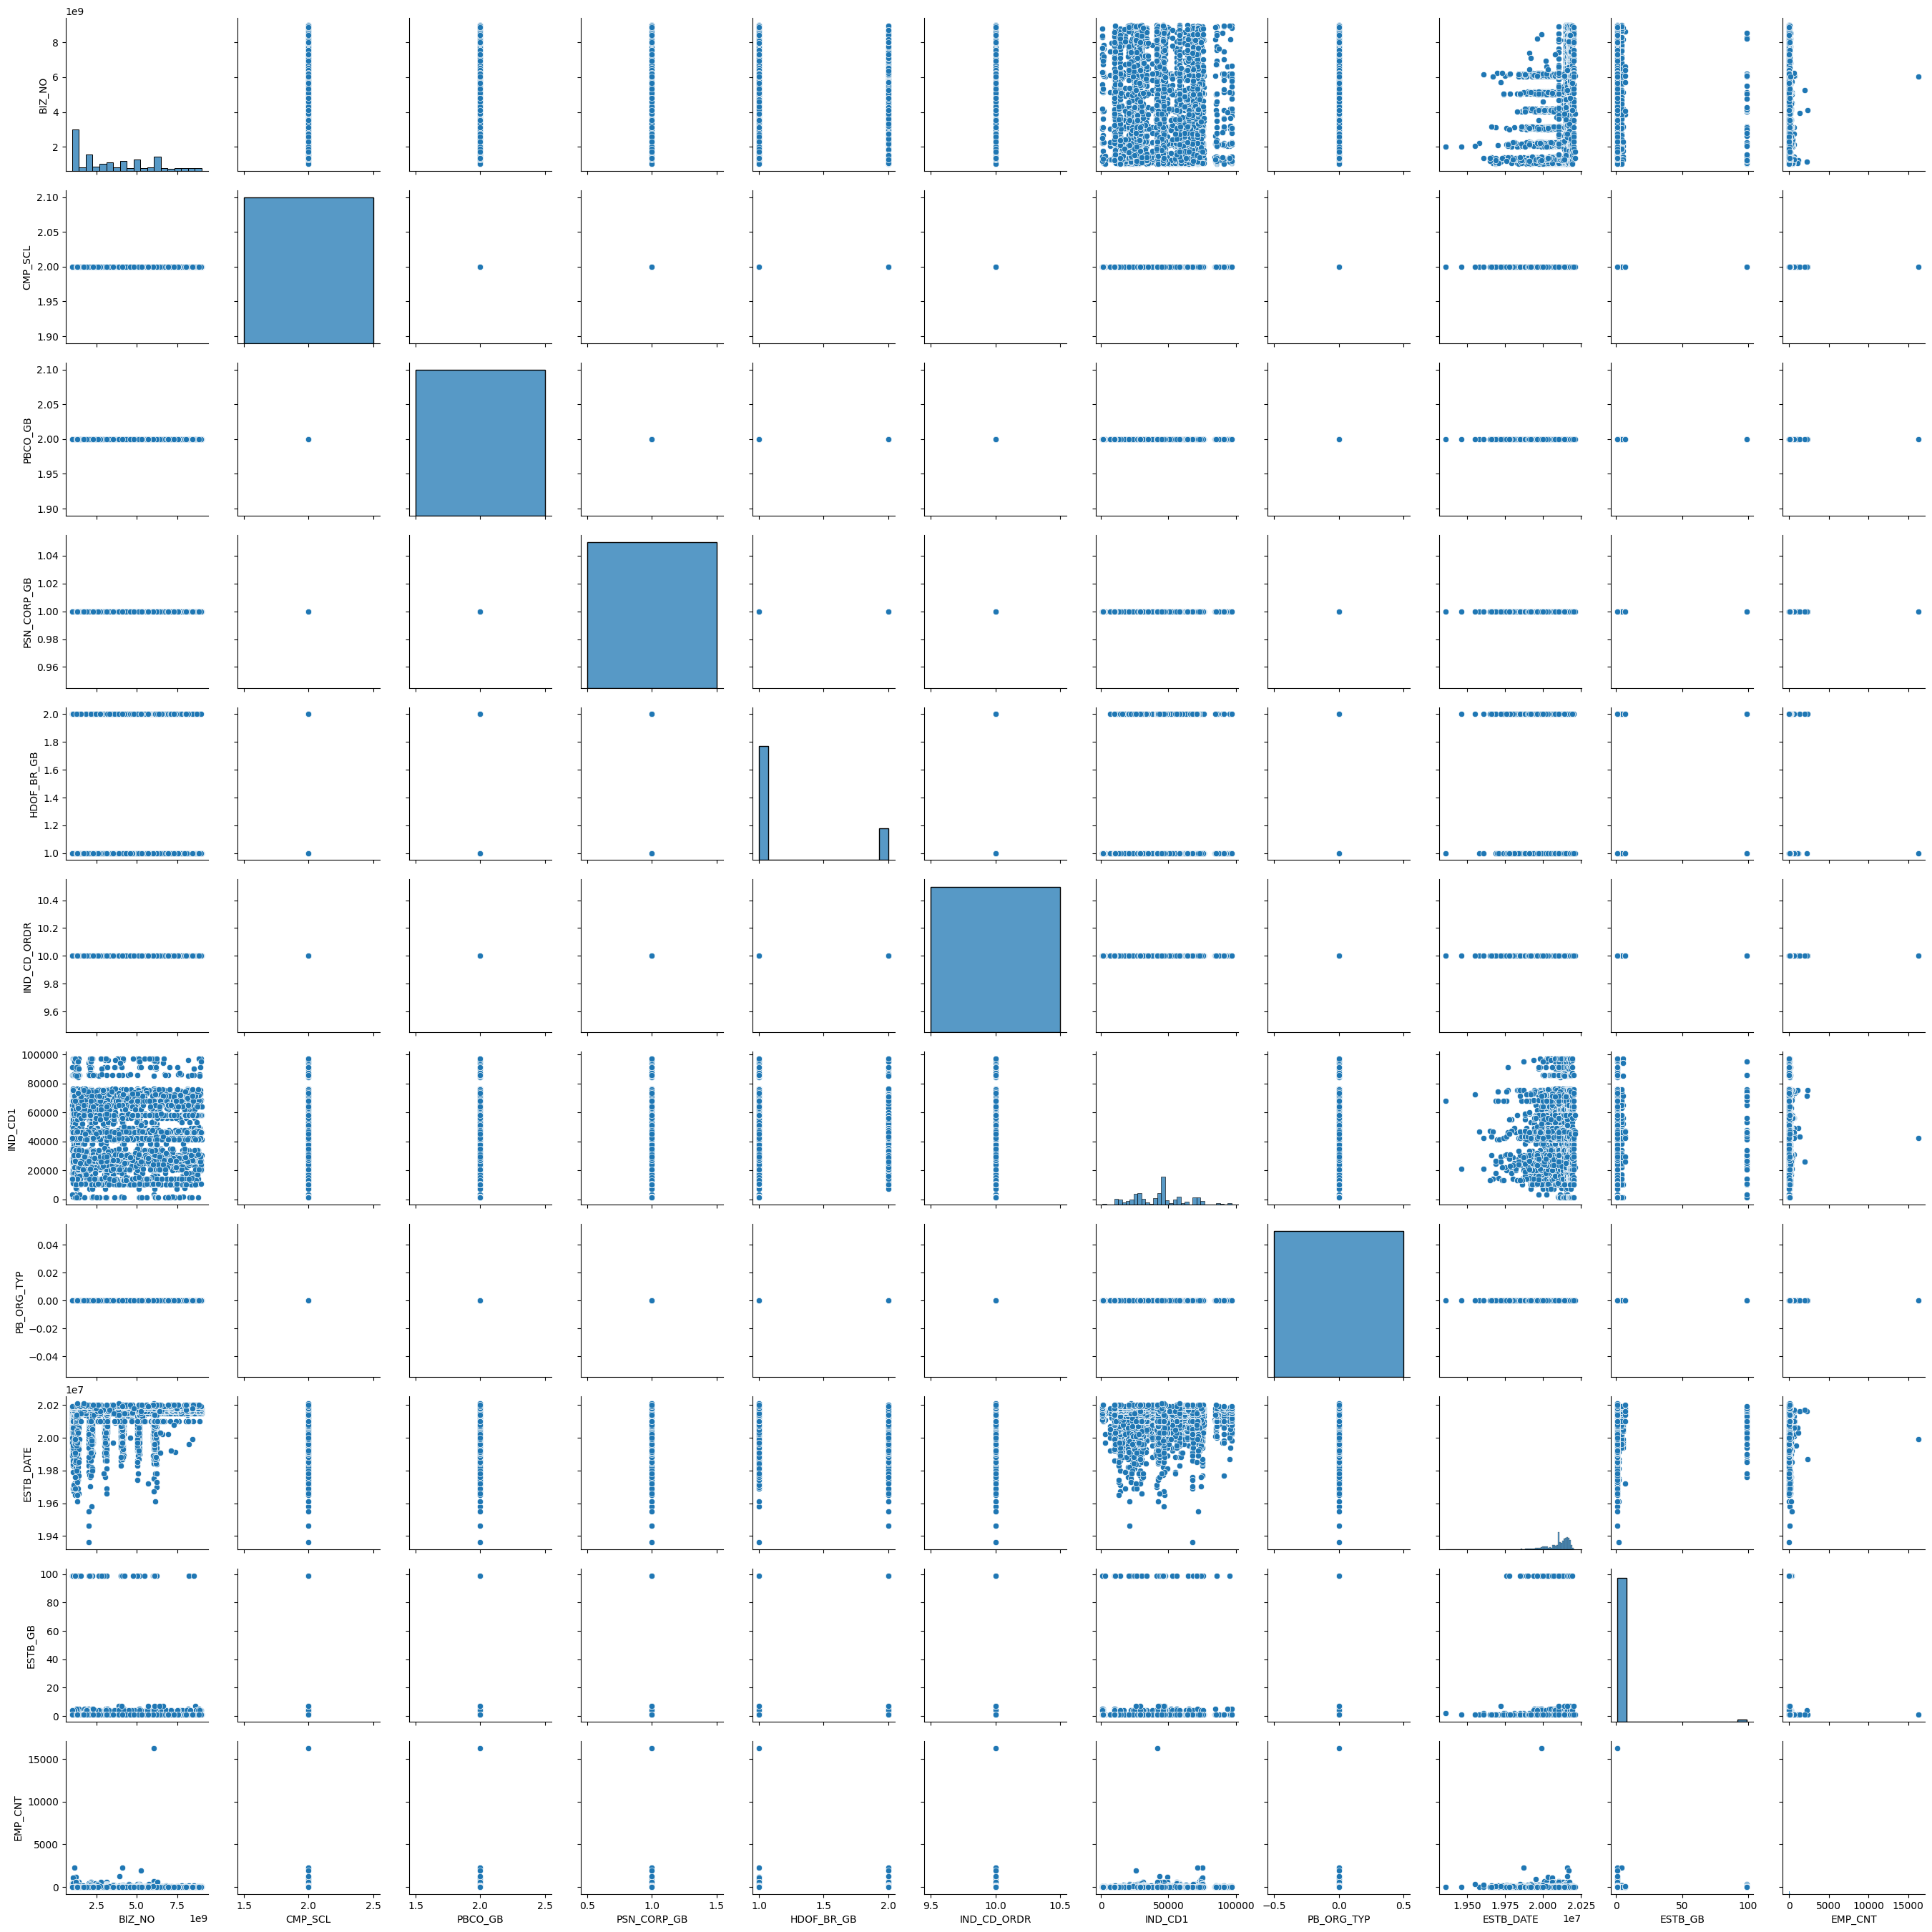

In [67]:
sns.pairplot(nb_deactive_out_copy)

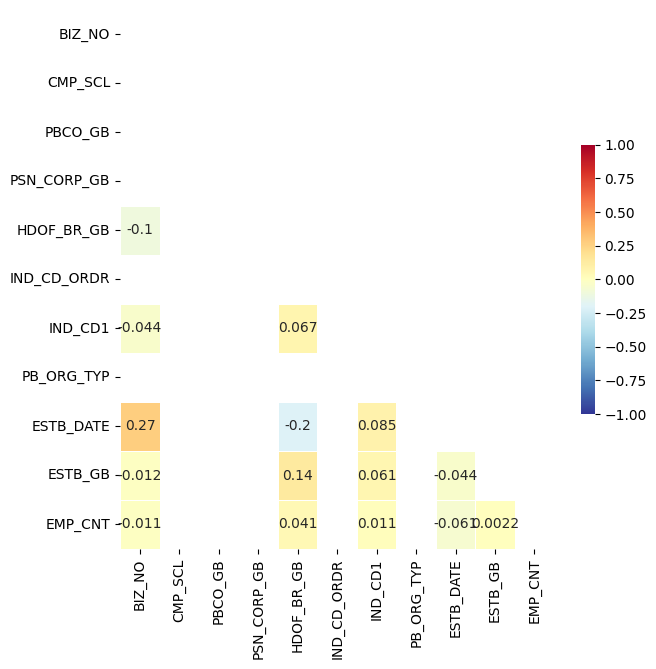

In [68]:
# 히트맵
df = nb_deactive_out_copy.corr()
fig, ax = plt.subplots( figsize=(7,7) )
mask = np.zeros_like(df, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# 히트맵을 그린다
sns.heatmap(df, 
            cmap = 'RdYlBu_r', 
            annot = True,   # 실제 값을 표시한다
            mask=mask,      # 표시하지 않을 마스크 부분을 지정한다
            linewidths=.5,  # 경계면 실선으로 구분하기
            cbar_kws={"shrink": .5},# 컬러바 크기 절반으로 줄이기
            vmin = -1,vmax = 1   # 컬러바 범위 -1 ~ 1
           )  
plt.show()

### 액티브 외감 데이터 / 휴폐업 데이터 라벨링 하여 머지

In [73]:
# 라벨링 하여 concat
nb_deactive_out_copy['target'] = 1
nb_active_out_copy['target'] = 0
nb_concat = pd.concat([nb_active_out_copy, nb_deactive_out_copy])
nb_concat

,BIZ_NO,CMP_SCL,PBCO_GB,PSN_CORP_GB,HDOF_BR_GB,IND_CD_ORDR,IND_CD1,PB_ORG_TYP,ESTB_DATE,ESTB_GB,EMP_CNT,target
0,1138111739,2,2,1,1,10.0,47712.0,0,19660419.0,1,43.000000,0
1,2078132193,2,2,1,1,10.0,15190.0,0,19910806.0,1,35.000000,0
2,1318167565,2,2,1,1,10.0,49212.0,0,20011030.0,1,149.000000,0
3,5048128251,2,2,1,1,10.0,30391.0,0,19990112.0,1,75.000000,0
4,1098164260,2,2,1,1,10.0,46800.0,0,20000531.0,1,3.000000,0
...,...,...,...,...,...,...,...,...,...,...,...,...
6734,4808501629,2,2,1,2,10.0,10200.0,0,20180126.0,1,25.987275,1
6735,8018501578,2,2,1,2,10.0,10122.0,0,20200727.0,1,22.000000,1
6736,4118523419,2,2,1,2,10.0,56111.0,0,20190926.0,1,0.000000,1
6737,1738102533,2,2,1,1,10.0,58222.0,0,20211025.0,1,25.987275,1


In [135]:
# 액티브 / 휴폐업 비율 확인
nb_concat.target.value_counts()

0    28982
1     6739
Name: target, dtype: int64

In [74]:
# 연관성 분석
nb_concat.corr().drop('target')['target']

BIZ_NO         0.067109
CMP_SCL             NaN
PBCO_GB        0.006751
PSN_CORP_GB         NaN
HDOF_BR_GB     0.139498
IND_CD_ORDR         NaN
IND_CD1       -0.021817
PB_ORG_TYP    -0.014969
ESTB_DATE      0.211614
ESTB_GB        0.054632
EMP_CNT       -0.093820
Name: target, dtype: float64

In [78]:
# 최소자승법 분석
form1 = 'target~' + '+'.join(nb_concat.columns[:-1])
lr1 = ols(form1, nb_concat).fit()
lr1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 target   R-squared:                       0.075
Model:                            OLS   Adj. R-squared:                  0.075
Method:                 Least Squares   F-statistic:                     363.0
Date:                Thu, 27 Oct 2022   Prob (F-statistic):               0.00
Time:                        15:21:19   Log-Likelihood:                -15767.
No. Observations:               35721   AIC:                         3.155e+04
Df Residuals:                   35712   BIC:                         3.163e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept      -0.1395      0.005    -30.523      0.000      -0.148      -0.131
BIZ_NO       2.166e-12   9.46e-13      2.290      0.022    3.12e-13    4.02e-12
CMP_SCL        -0.2790      0.009    -30.523      0.000      -0.297      -0.261
PBCO_GB        -0.2289      0.149     -1.537      0.124      -0.521       0.063
PSN_CORP_GB    -0.1395      0.005    -30.523      0.000      -0.148      -0.131
HDOF_BR_GB      0.1676      0.006     27.188      0.000       0.156       0.180
IND_CD_ORDR    -1.3949      0.046    -30.523      0.000      -1.484      -1.305
IND_CD1     -1.144e-06   1.01e-07    -11.337      0.000   -1.34e-06   -9.46e-07
PB_ORG_TYP     -0.0620      0.023     -2.675      0.007      -0.107      -0.017
ESTB_DATE    7.627e-07    1.9e-08     40.122      0.000    7.25e-07       8e-07
ESTB_GB         0.0017      0.000      6.548      0.000       0.001       0.002
EMP_CNT        -0.0002   1.32e-05    -11.877      0.000      -0.000      -0.000
==============================================================================
Omnibus:                     7186.874   Durbin-Watson:                   0.057
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            12405.500
Skew:                           1.418   Prob(JB):                         0.00
Kurtosis:                       3.540   Cond. No.                     2.38e+26
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 9.92e-30. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [85]:
# 유의미한 피쳐값들 추출
lr1_pvalue = round(lr1.pvalues[lr1.pvalues < 0.05], 4)
lr1_pvalue = pd.DataFrame(lr1_pvalue, columns=['pvalue'])
lr1_pvalue

,pvalue
Intercept,0.0000
BIZ_NO,0.0220
CMP_SCL,0.0000
PSN_CORP_GB,0.0000
HDOF_BR_GB,0.0000
IND_CD_ORDR,0.0000
IND_CD1,0.0000
PB_ORG_TYP,0.0075
ESTB_DATE,0.0000
ESTB_GB,0.0000


In [86]:
nb_concat.columns

Index(['BIZ_NO', 'CMP_SCL', 'PBCO_GB', 'PSN_CORP_GB', 'HDOF_BR_GB',
       'IND_CD_ORDR', 'IND_CD1', 'PB_ORG_TYP', 'ESTB_DATE', 'ESTB_GB',
       'EMP_CNT', 'target'],
      dtype='object')

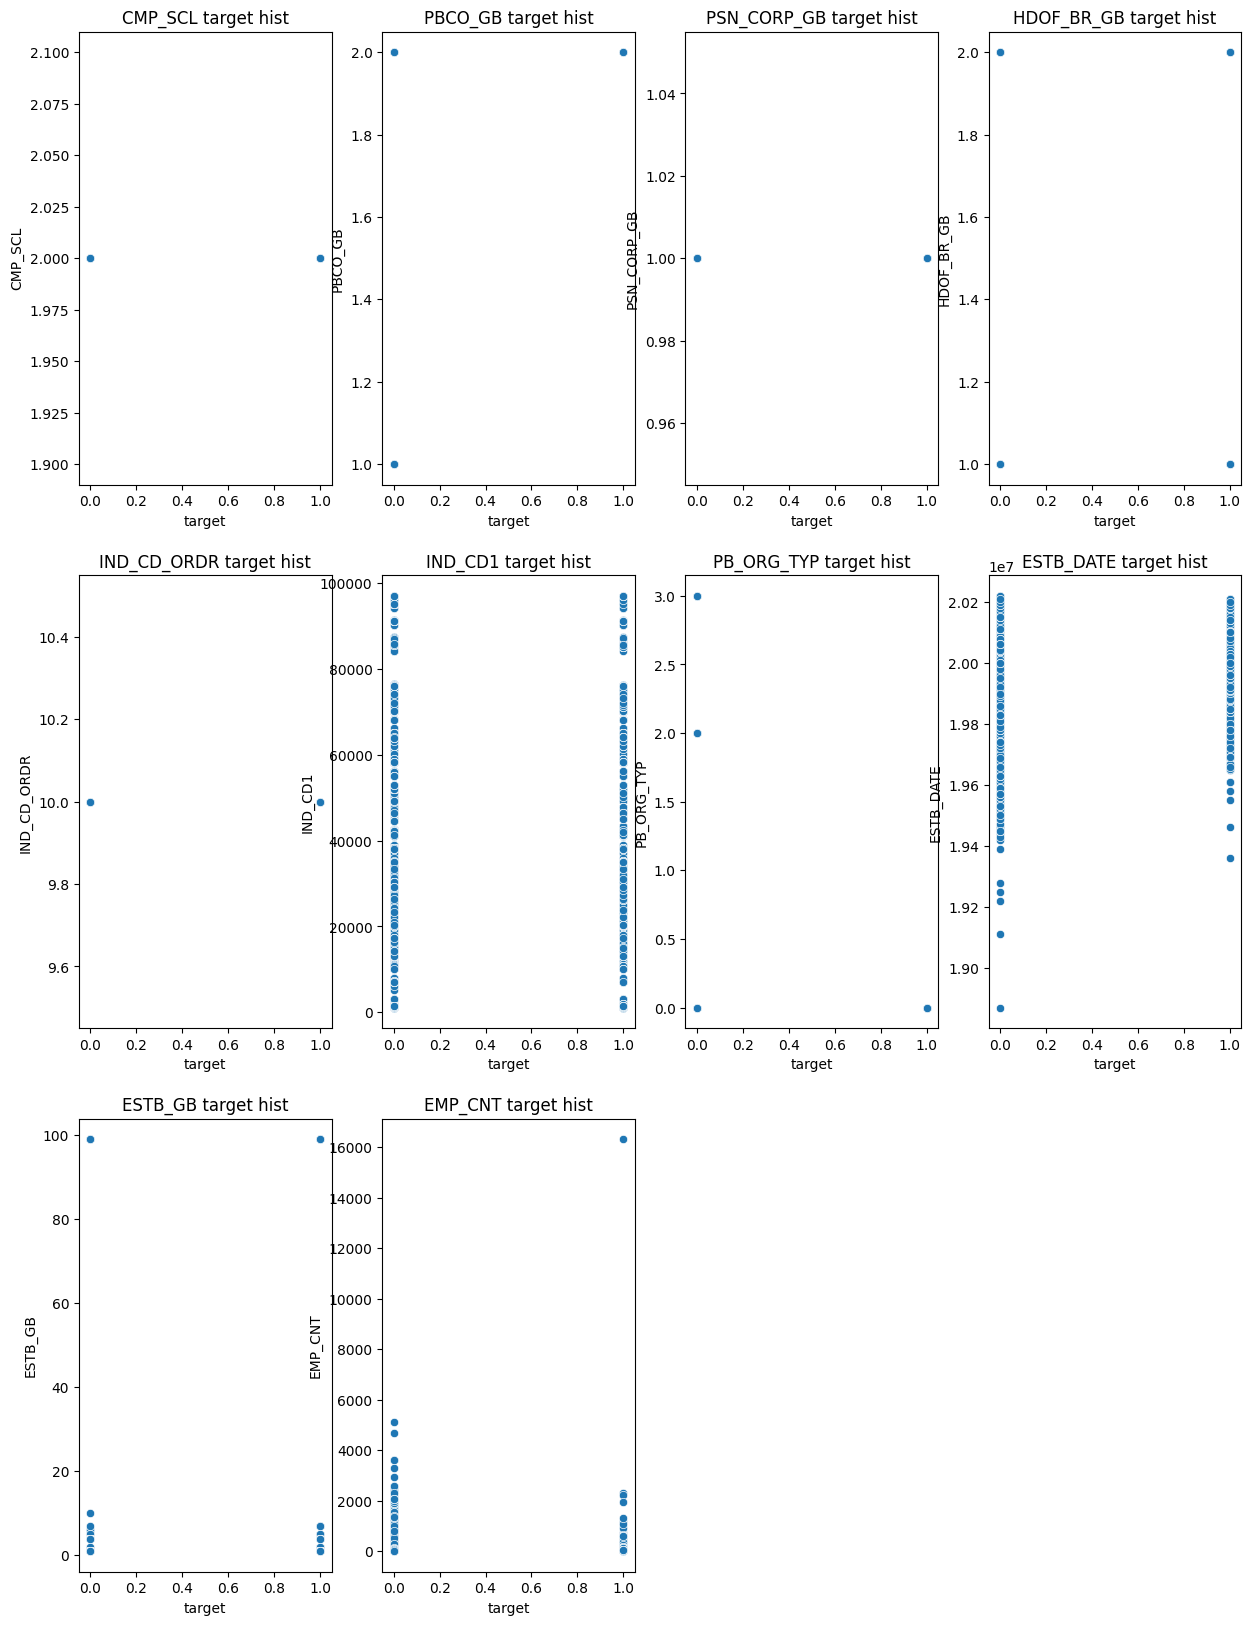

In [124]:
# 스캐터 plot
plt.figure(figsize=(3*5, 4*5))
for col in range(1, 11):
    plt.subplot(3, 4, col)
    sns.scatterplot(data = nb_concat, x = 'target', y = nb_concat.columns[col])
    plt.title(f'{nb_concat.columns[col]} target hist')
plt.show()

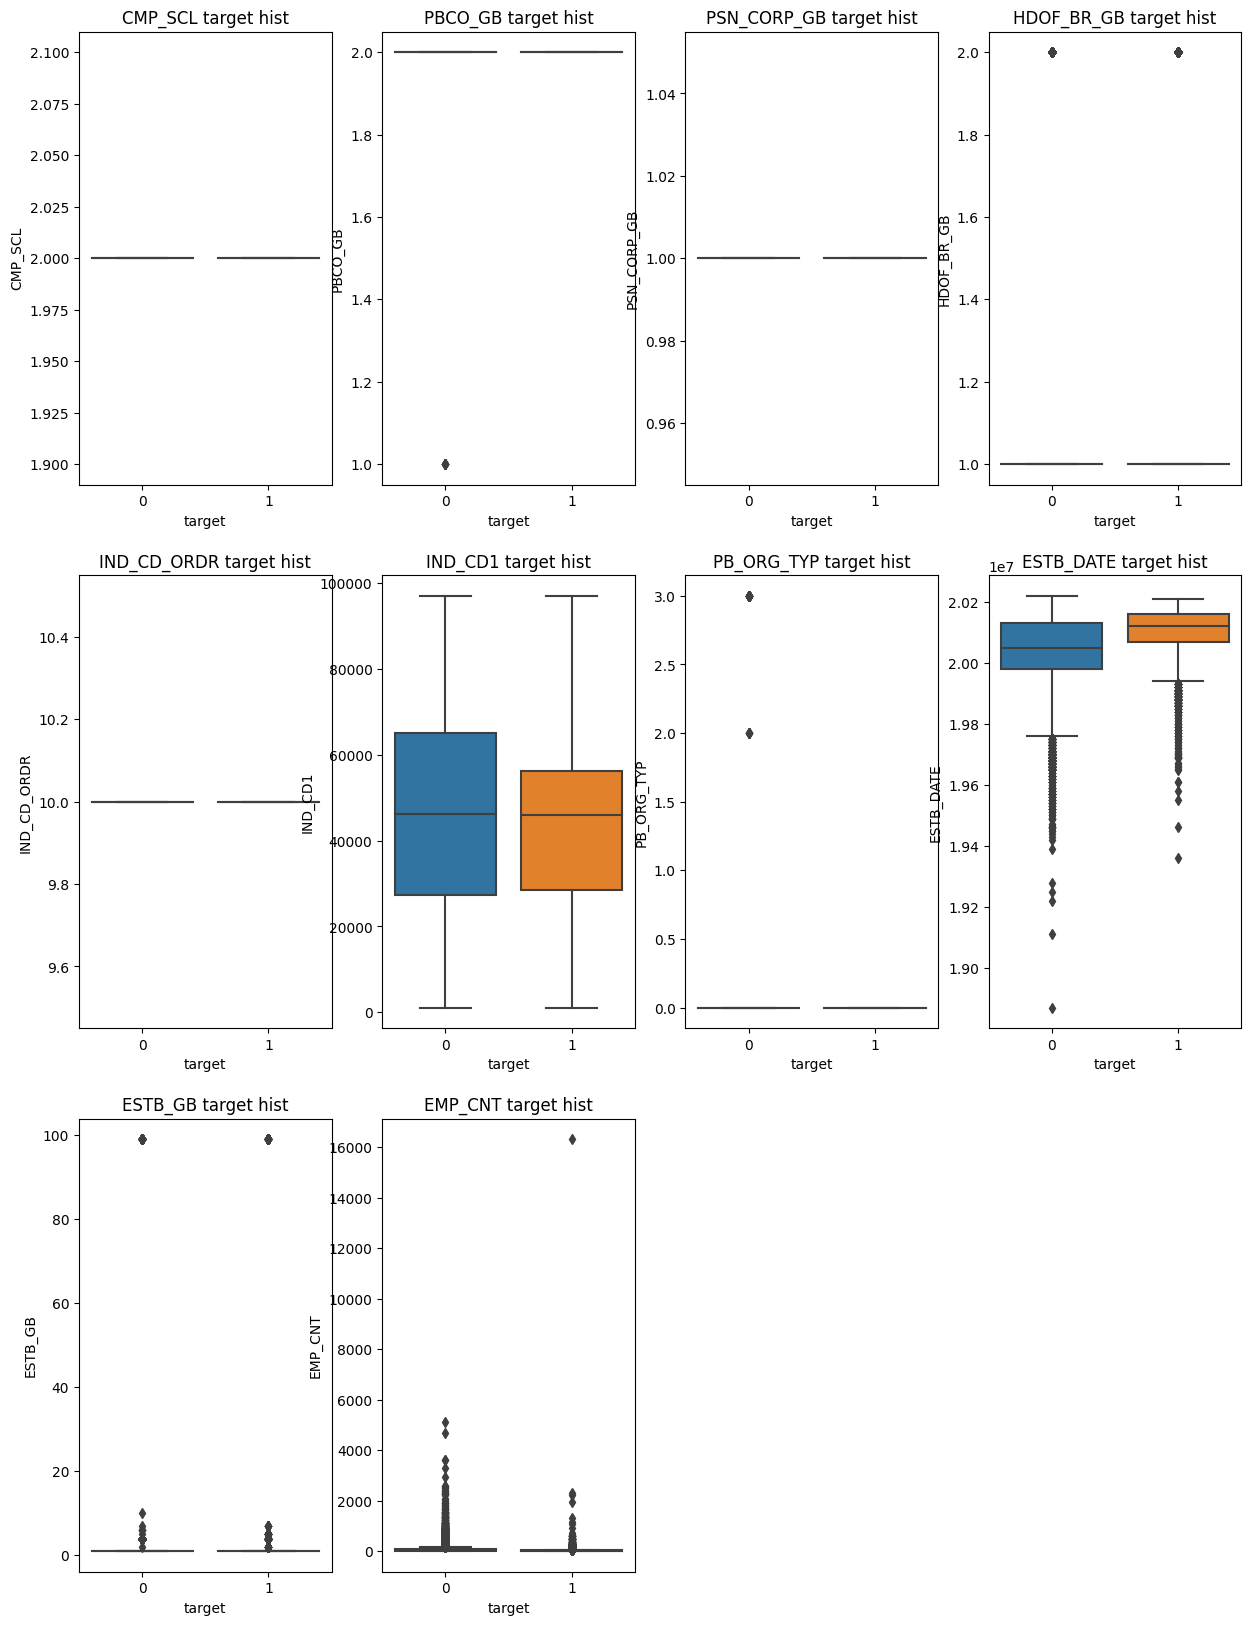

In [130]:
# 박스 plot
plt.figure(figsize=(3*5, 4*5))
for col in range(1, 11):
    plt.subplot(3, 4, col)
    sns.boxplot(data = nb_concat, x = 'target', y = nb_concat.columns[col])
    plt.title(f'{nb_concat.columns[col]} target hist')
plt.show()

## 재무 데이터에 라벨링(액티브 target=0, 휴폐업 target=1) 한 데이터 EDA

In [151]:
# 사전에 사업자 번호 기준으로 합쳐둔 후 NaN (평균치)처리한 데이터 호출
finan_merge = pd.read_csv('재무데이터_액티브외감(0)_휴폐업(1)_머지.csv')
finan_merge

,사업자번호,유동자산,매출채권,비유동자산,유형자산,자산총계,유동부채,비유동부채,부 채 총 계,자본금,...,부채총계대 매출액(%),총자본회전율(회),재고자산회전율(회),매출채권회전율(회),매입채무회전율(회),미수금,매출원가,무형자산,재고자산,target
0,1018100340,2.070964e+06,1.433848e+05,3.549089e+07,1.118161e+06,3.756186e+07,5.333542e+06,1.045350e+07,1.578704e+07,721100.0,...,2.503123e+02,1.642500e-01,1.000000e+12,5.171175e+01,1.000000e+12,3243.000000,2.278457e+07,1.180309e+06,7.150063e+06,0
1,1018100772,4.828732e+05,1.218333e+04,2.089307e+07,2.088182e+07,2.137594e+07,3.142721e+06,1.204274e+07,1.518546e+07,52000.0,...,2.489536e+03,3.875000e-02,1.000000e+12,2.500000e+11,1.000000e+12,441694.500000,5.181350e+05,1.180309e+06,7.150063e+06,0
2,1018101126,1.491190e+06,1.021362e+05,3.550742e+07,3.435322e+07,3.699861e+07,8.974535e+06,3.180149e+06,1.215468e+07,1539640.0,...,4.684630e+02,8.025000e-02,1.000000e+12,2.581250e+01,1.000000e+12,902.750000,1.516039e+06,5.275000e+02,7.150063e+06,0
3,1018101242,5.428135e+05,1.440118e+05,2.465907e+07,2.200939e+07,2.520188e+07,6.706615e+06,2.318500e+06,9.025115e+06,450000.0,...,3.380270e+02,1.075000e-01,1.000000e+12,1.859625e+01,1.000000e+12,442720.533731,1.178152e+06,1.180309e+06,7.150063e+06,0
4,1018103819,1.667547e+06,4.804125e+04,1.150967e+07,1.108649e+07,1.317722e+07,6.715410e+06,1.568218e+06,8.283628e+06,500000.0,...,7.660750e+02,8.225000e-02,1.000000e+12,2.059725e+01,1.000000e+12,12500.000000,2.278457e+07,1.180309e+06,7.150063e+06,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35704,8998700283,1.008218e+06,4.940150e+05,2.950450e+05,2.750500e+04,1.303263e+06,2.843760e+05,1.480000e+05,4.323760e+05,503000.0,...,1.476500e+01,2.181500e+00,5.713500e+00,8.110500e+00,1.325500e+01,442720.533731,2.736914e+06,1.180309e+06,3.406730e+05,1
35705,8998701263,9.025398e+06,4.323139e+06,1.887536e+07,1.324823e+07,9.025398e+06,1.655333e+03,7.272607e+05,7.289157e+05,459000.0,...,9.444444e+11,3.333333e+11,1.000000e+12,1.000000e+12,1.000000e+12,442720.533731,2.278457e+07,1.180309e+06,7.150063e+06,1
35706,8998800150,8.987382e+06,1.454567e+06,2.287665e+07,1.850289e+07,3.186404e+07,1.800650e+07,1.739726e+06,1.974623e+07,990000.0,...,6.216600e+01,1.053750e+00,8.888400e+01,2.279075e+01,1.078650e+01,6738.750000,1.384895e+06,1.057015e+05,4.167090e+05,0
35707,8998800427,7.198705e+06,2.728476e+06,7.227014e+06,6.594312e+06,1.442572e+07,7.778158e+06,4.469290e+06,1.224745e+07,489500.0,...,2.500000e+11,2.500000e+11,2.500000e+11,2.500000e+11,2.500000e+11,321181.333333,1.542906e+07,4.426120e+05,2.826867e+06,0


In [152]:
# 값 분포 : 
finan_merge.target.value_counts()

0    28978
1     6731
Name: target, dtype: int64

In [153]:
finan_merge.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35709 entries, 0 to 35708
Data columns (total 46 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   사업자번호         35709 non-null  int64  
 1   유동자산          35709 non-null  float64
 2   매출채권          35709 non-null  float64
 3   비유동자산         35709 non-null  float64
 4   유형자산          35709 non-null  float64
 5   자산총계          35709 non-null  float64
 6   유동부채          35709 non-null  float64
 7   비유동부채         35709 non-null  float64
 8   부  채  총  계    35709 non-null  float64
 9   자본금           35709 non-null  float64
 10  이익잉여금(결손금）    35709 non-null  float64
 11  자본총계          35709 non-null  float64
 12  매출액           35709 non-null  float64
 13  판매비와관리비       35709 non-null  float64
 14  영업이익（손실）      35709 non-null  float64
 15  법인세비용차감전순손익   35709 non-null  float64
 16  법인세비용         35709 non-null  float64
 17  당기순이익(손실)     35709 non-null  float64
 18  기업순이익률(%)     35709 non-nu

In [167]:
# 컬럼 이름 문제 없게 변경
finan_merge.rename(columns={'부  채  총  계' : '부채총계',
                        '이익잉여금(결손금）': '이익잉여금(결손금)',
                        '영업이익（손실）' : '영업이익(손실)',
                        '금융비용대총비용비율(%' : '금융비용대총비용비율(%)'
                        }, inplace=True)
for col in finan_merge.columns:
    change_col = col.replace('(', '')
    change_col = change_col.replace('%', '')
    change_col = change_col.replace('/', '')
    change_col = change_col.replace(' ', '')
    change_col = change_col.replace(')', '').strip()
    finan_merge.rename(columns={col : change_col}, inplace=True)
finan_merge.columns

Index(['사업자번호', '유동자산', '매출채권', '비유동자산', '유형자산', '자산총계', '유동부채', '비유동부채',
       '부채총계', '자본금', '이익잉여금결손금', '자본총계', '매출액', '판매비와관리비', '영업이익손실',
       '법인세비용차감전순손익', '법인세비용', '당기순이익손실', '기업순이익률', '유보액총자산', '유보액납입자본',
       '매출액총이익률', '매출액영업이익률', '매출액순이익률', '수지비율', '경상수지비율', '영업비율',
       '금융비용대매출액비율', '금융비용대부채비율', '금융비용대총비용비율', '부채비율', '차입금의존도', '자기자본비율',
       '순운전자본비율', '유동부채비율', '비유동부채비율', '부채총계대매출액', '총자본회전율회', '재고자산회전율회',
       '매출채권회전율회', '매입채무회전율회', '미수금', '매출원가', '무형자산', '재고자산', 'target'],
      dtype='object')

In [168]:
# 최소 자승밥 분석
form2 = 'target~' + '+'.join(finan_merge.columns[1:-1])
lr2 = ols(form2, finan_merge).fit()
lr2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 target   R-squared:                       0.238
Model:                            OLS   Adj. R-squared:                  0.237
Method:                 Least Squares   F-statistic:                     253.7
Date:                Thu, 27 Oct 2022   Prob (F-statistic):               0.00
Time:                        16:27:57   Log-Likelihood:                -12284.
No. Observations:               35709   AIC:                         2.466e+04
Df Residuals:                   35664   BIC:                         2.504e+04
Df Model:                          44                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept       0.2355      0.004     67.021      0.000       0.229       0.242
유동자산        -2.163e-09   2.14e-10    -10.128      0.000   -2.58e-09   -1.74e-09
매출채권         1.508e-09   2.13e-10      7.094      0.000    1.09e-09    1.93e-09
비유동자산       -1.387e-09   1.47e-10     -9.464      0.000   -1.67e-09    -1.1e-09
유형자산        -3.462e-10    9.2e-11     -3.763      0.000   -5.27e-10   -1.66e-10
자산총계        -1.053e-08   2.51e-09     -4.189      0.000   -1.55e-08    -5.6e-09
유동부채         2.265e-09    2.8e-10      8.102      0.000    1.72e-09    2.81e-09
비유동부채        2.253e-09   2.42e-10      9.309      0.000    1.78e-09    2.73e-09
부채총계         9.225e-09   2.53e-09      3.641      0.000    4.26e-09    1.42e-08
자본금         -7.966e-10    2.5e-10     -3.181      0.001   -1.29e-09   -3.06e-10
이익잉여금결손금    -8.631e-10   1.29e-10     -6.700      0.000   -1.12e-09   -6.11e-10
자본총계         1.251e-08   2.51e-09      4.977      0.000    7.58e-09    1.74e-08
매출액         -1.484e-09   2.89e-10     -5.127      0.000   -2.05e-09   -9.16e-10
판매비와관리비      2.354e-10   3.45e-10      0.683      0.495    -4.4e-10    9.11e-10
영업이익손실       1.545e-09   7.12e-10      2.169      0.030    1.49e-10    2.94e-09
법인세비용차감전순손익 -9.502e-09   3.45e-09     -2.752      0.006   -1.63e-08   -2.73e-09
법인세비용        9.386e-09   3.08e-09      3.042      0.002    3.34e-09    1.54e-08
당기순이익손실      9.079e-09   3.51e-09      2.587      0.010     2.2e-09     1.6e-08
기업순이익률      -6.682e-14   3.32e-14     -2.011      0.044   -1.32e-13   -1.69e-15
유보액총자산       3.787e-13   9.97e-14      3.800      0.000    1.83e-13    5.74e-13
유보액납입자본      2.269e-14    8.3e-14      0.273      0.785    -1.4e-13    1.85e-13
매출액총이익률     -4.188e-13   1.12e-13     -3.724      0.000   -6.39e-13   -1.98e-13
매출액영업이익률    -2.556e-13   1.34e-13     -1.906      0.057   -5.18e-13    7.23e-15
매출액순이익률     -4.464e-13   1.16e-13     -3.843      0.000   -6.74e-13   -2.19e-13
수지비율         3.602e-13   4.15e-14      8.688      0.000    2.79e-13    4.41e-13
경상수지비율      -3.567e-13   7.58e-15    -47.090      0.000   -3.72e-13   -3.42e-13
영업비율        -1.231e-14    6.2e-14     -0.199      0.843   -1.34e-13    1.09e-13
금융비용대매출액비율    1.73e-14   2.28e-14      0.759      0.448   -2.74e-14     6.2e-14
금융비용대부채비율   -3.199e-13   1.68e-14    -19.057      0.000   -3.53e-13   -2.87e-13
금융비용대총비용비율   3.009e-14   2.15e-14      1.399      0.162   -1.21e-14    7.23e-14
부채비율         8.837e-15   9.72e-15      0.909      0.363   -1.02e-14    2.79e-14
차입금의존도      -4.325e-14   9.23e-15     -4.685      0.000   -6.13e-14   -2.52e-14
자기자본비율      -3.734e-13   6.59e-14     -5.664      0.000   -5.03e-13   -2.44e-13
순운전자본비율     -3.419e-13   6.77e-14     -5.048      0.000   -4.75e-13   -2.09e-13
유동부채비율       3.068e-13   6.59e-14      4.653      0.000    1.78e-13    4.36e-13
비유동부채비율      2.213e-13   8.43e-15     26.27

In [169]:
lr2_pvalue = round(lr2.pvalues[lr2.pvalues < 0.05], 4)
lr2_pvalue = pd.DataFrame(lr2_pvalue, columns=['pvalue'])
lr2_pvalue

,pvalue
Intercept,0.0000
유동자산,0.0000
매출채권,0.0000
비유동자산,0.0000
유형자산,0.0002
자산총계,0.0000
유동부채,0.0000
비유동부채,0.0000
부채총계,0.0003
자본금,0.0015


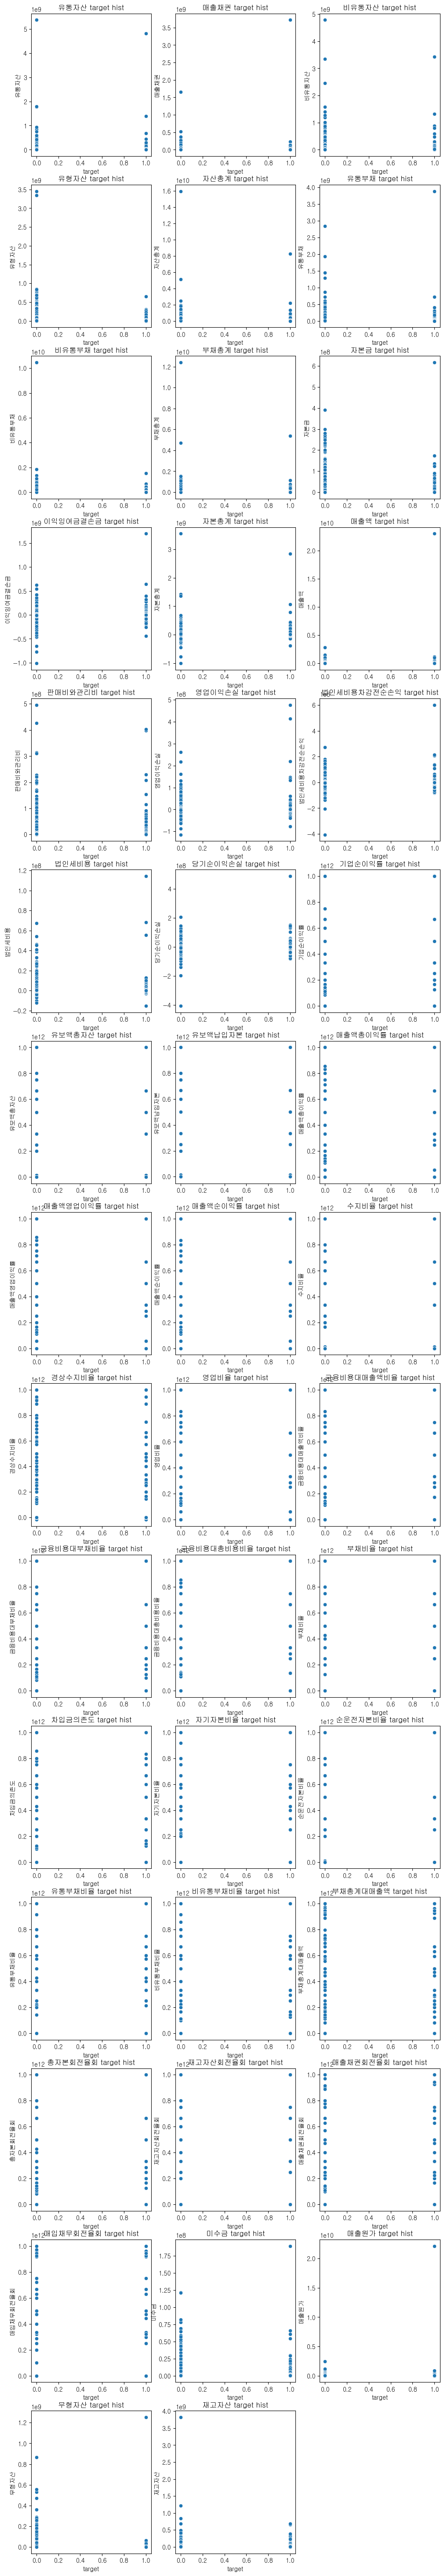

In [199]:
# 스캐터 plot
plt.figure(figsize=(12, 75))
plt.rcParams['font.family'] = 'gulim'
for col in range(1, 45):
    plt.subplot(15, 3, col)
    plt.title(f'{finan_merge.columns[col]} target hist')
    sns.scatterplot(data = finan_merge, x = 'target', y = finan_merge.columns[col])
plt.show()

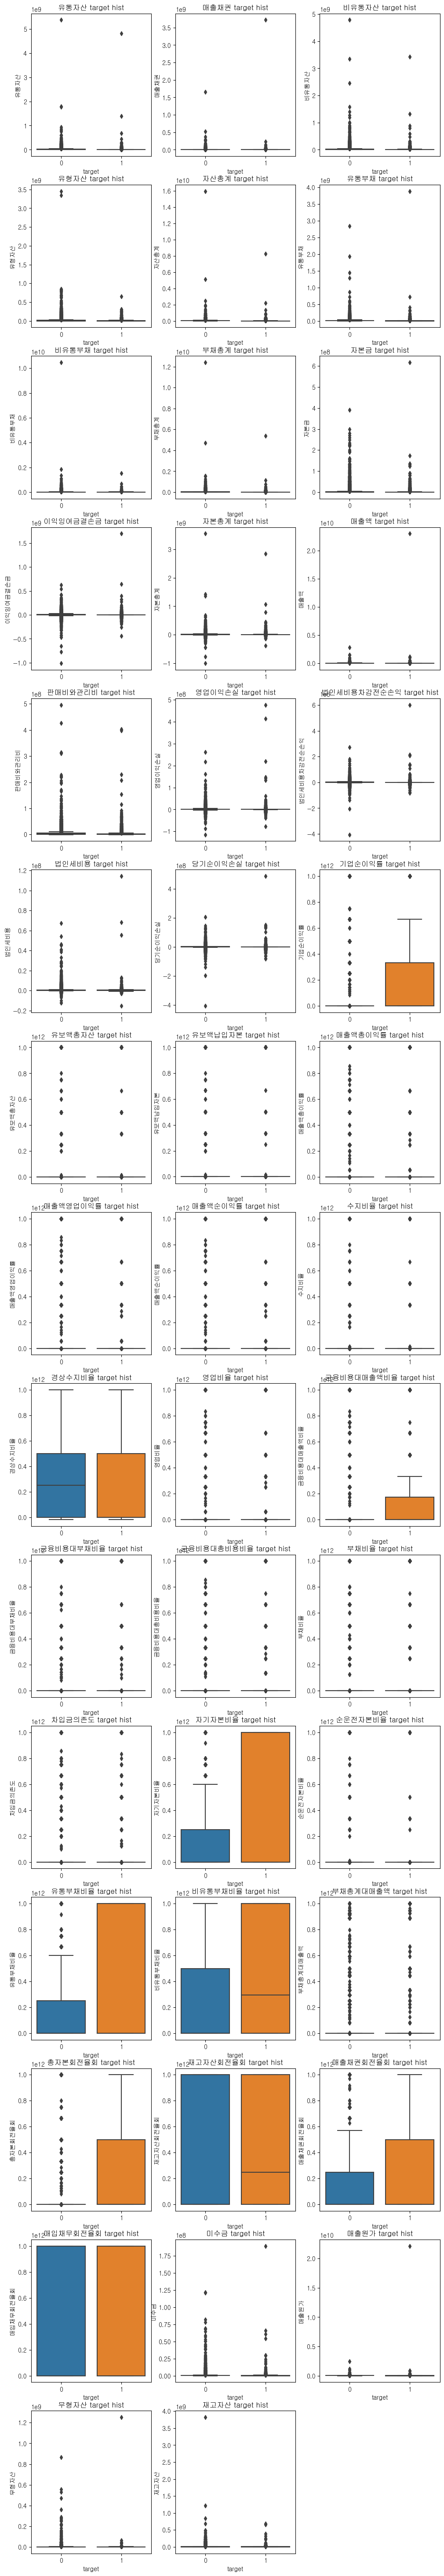

In [200]:
# 박스 plot
plt.figure(figsize=(12, 75))
plt.rcParams['font.family'] = 'gulim'
for col in range(1, 45):
    plt.subplot(15, 3, col)
    plt.title(f'{finan_merge.columns[col]} target hist')
    sns.boxplot(data = finan_merge, x = 'target', y = finan_merge.columns[col])
plt.show()

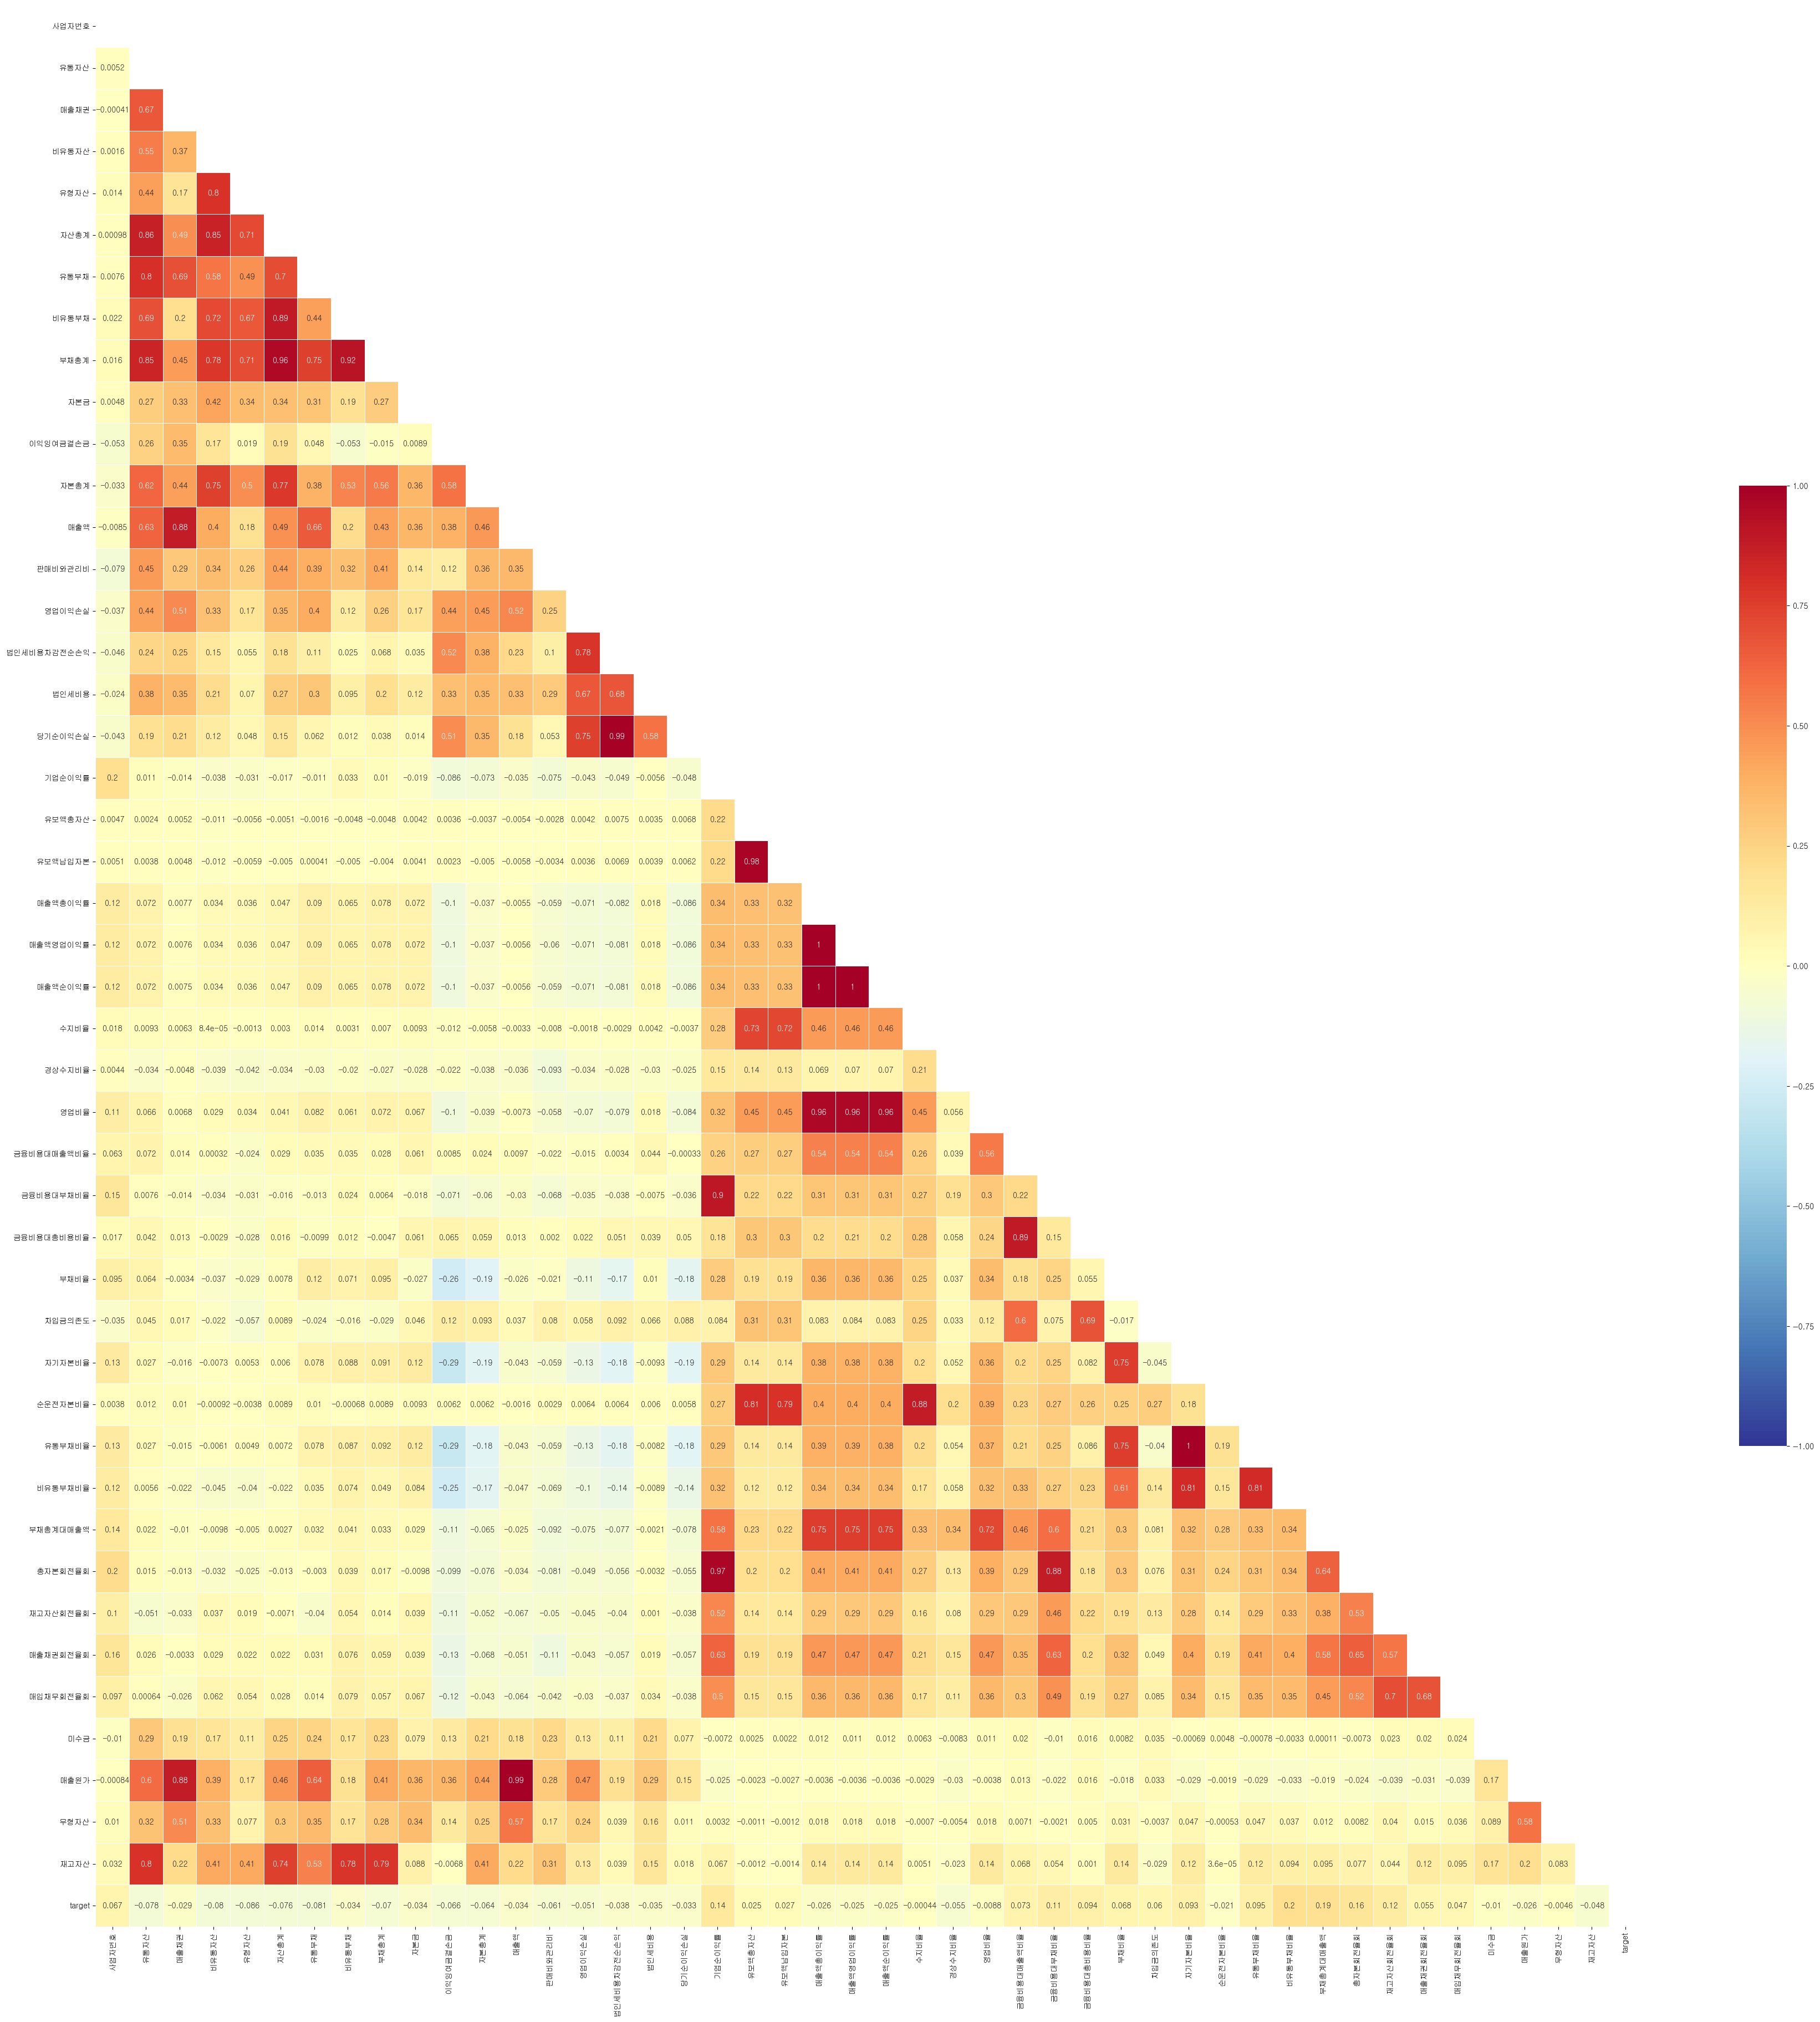

In [202]:
# 히트맵
df = finan_merge.corr()
fig, ax = plt.subplots( figsize=(45,45) )
mask = np.zeros_like(df, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# 히트맵을 그린다
sns.heatmap(df, 
            cmap = 'RdYlBu_r', 
            annot = True,   # 실제 값을 표시한다
            mask=mask,      # 표시하지 않을 마스크 부분을 지정한다
            linewidths=.5,  # 경계면 실선으로 구분하기
            cbar_kws={"shrink": .5},# 컬러바 크기 절반으로 줄이기
            vmin = -1,vmax = 1   # 컬러바 범위 -1 ~ 1
           )  
plt.show()